In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [197]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [198]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [200]:
df.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [201]:
df.shape

(12684, 26)

In [202]:
df = df.drop(columns=["car"])

In [203]:
df.dtypes

,0
destination,object
passanger,object
weather,object
temperature,int64
time,object
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object


Since the given dataset has only the categorical values missing and the missing values are also less I would go ahead and fill up the NULL values using the mode of that particular dataset also given that in each column less than 5% of the data is missing.


In [204]:
df["Bar"].fillna(df["Bar"].mode()[0], inplace=True)
df["CoffeeHouse"].fillna(df["CoffeeHouse"].mode()[0], inplace=True)
df["CarryAway"].fillna(df["CarryAway"].mode()[0], inplace=True)
df["RestaurantLessThan20"].fillna(df["RestaurantLessThan20"].mode()[0], inplace=True)
df["Restaurant20To50"].fillna(df["Restaurant20To50"].mode()[0], inplace=True)

<ipython-input-204-d4c86bb5a575>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Bar"].fillna(df["Bar"].mode()[0], inplace=True)
<ipython-input-204-d4c86bb5a575>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [205]:
df.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


Now that all the values are filled up we can remove all the duplicate entries to make our dataset more effecient


In [206]:
df.duplicated().sum()

np.int64(74)

In [207]:
df = df.drop_duplicates()

In [208]:
df.duplicated().sum()

np.int64(0)

Thus the data is now clean and all the missing values have been handled and the duplicated values have been removed.

In [209]:
#convert the current file to a new csv file
df = df.to_csv("cleaned_data.csv")

In [210]:
df = pd.read_csv("cleaned_data.csv")

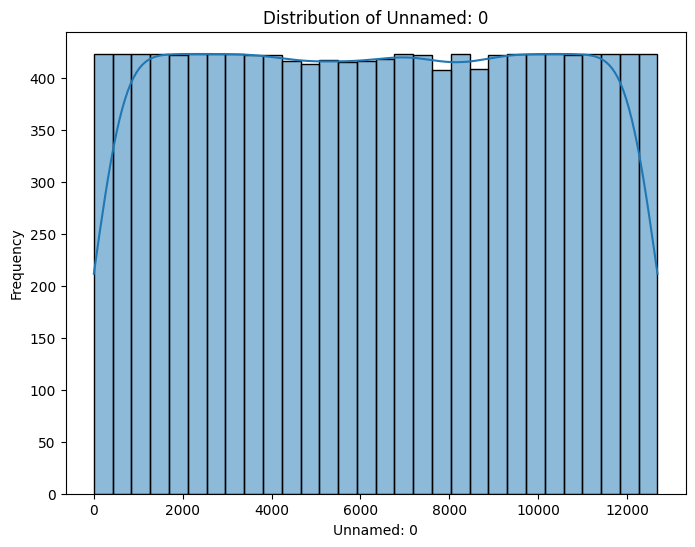

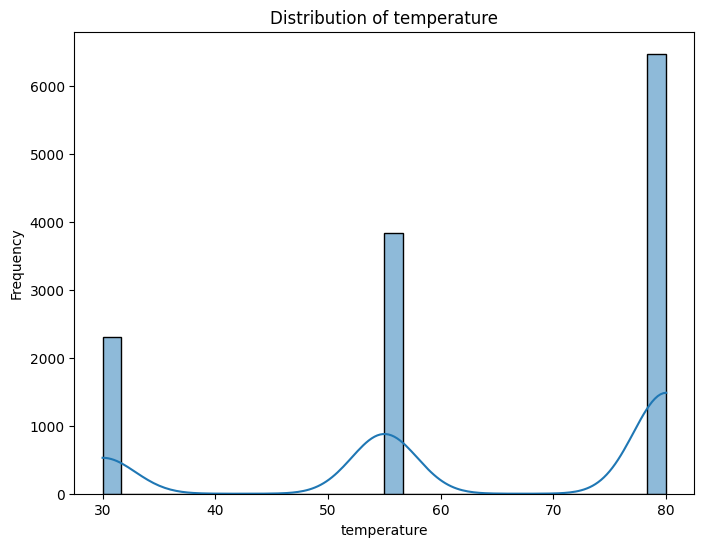

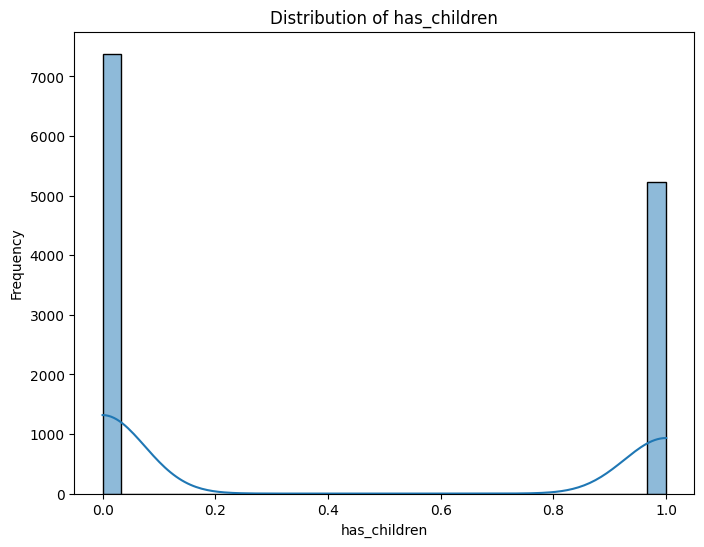

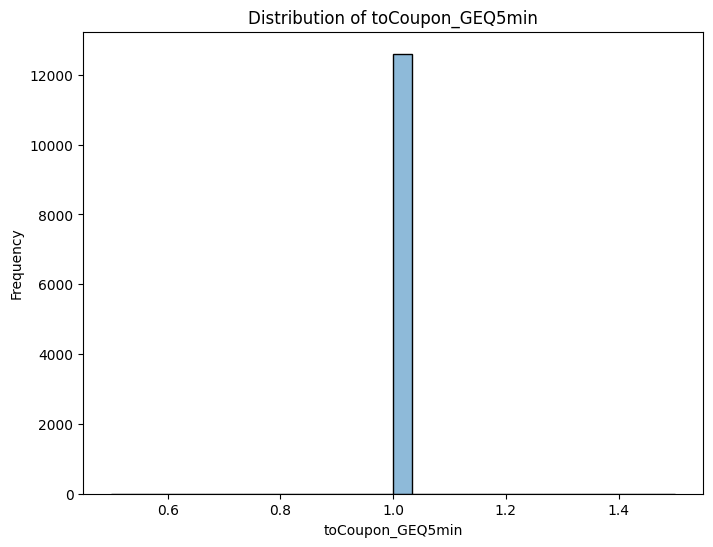

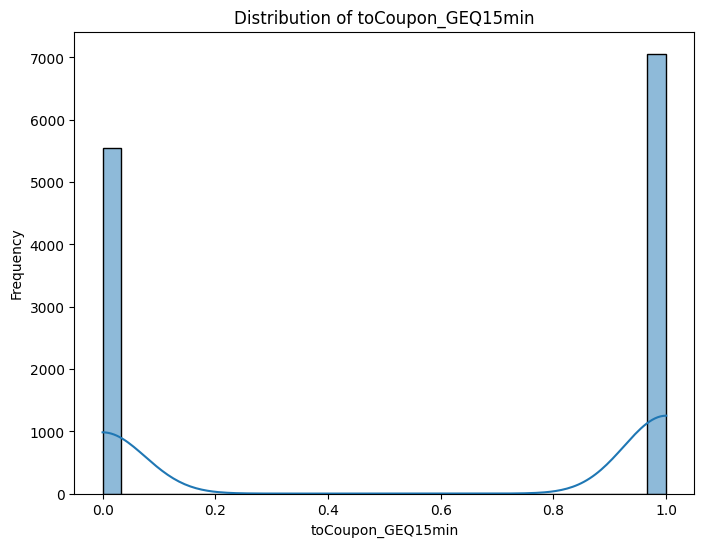

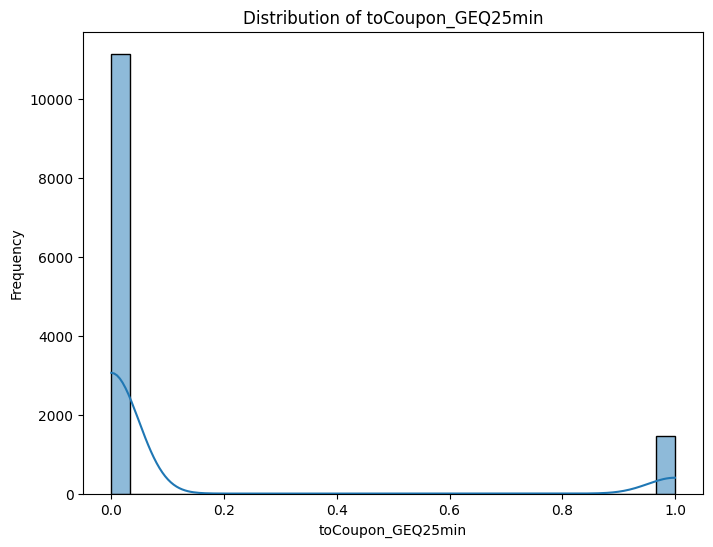

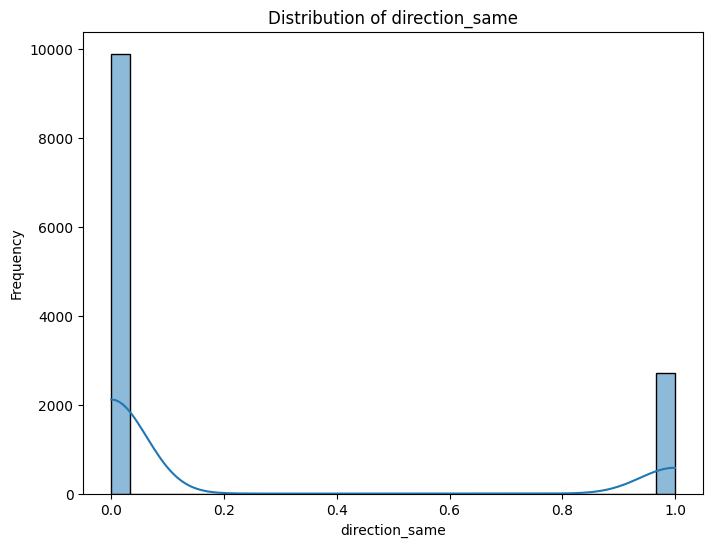

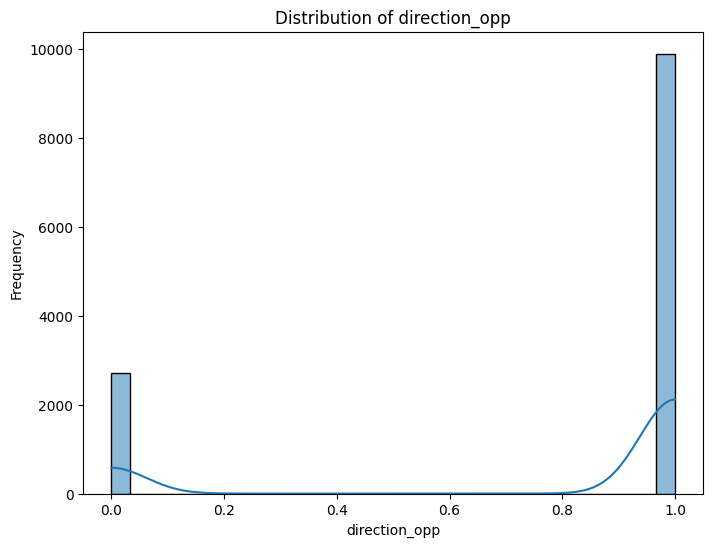

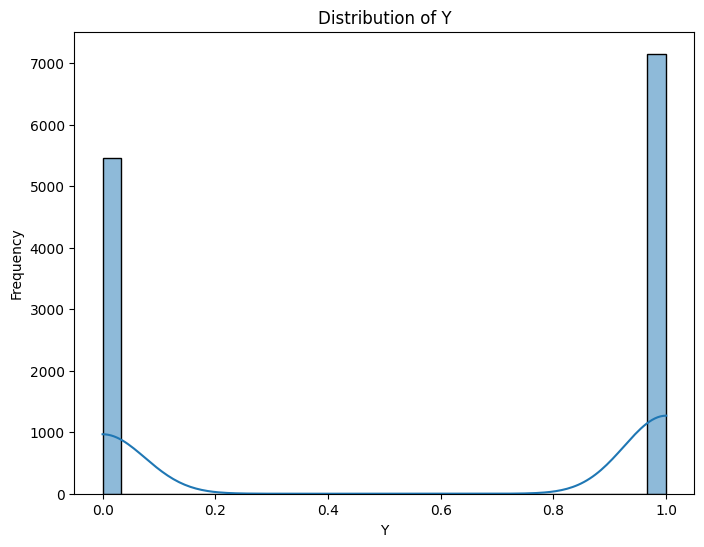

In [211]:
numeric_cols = df.select_dtypes(include=np.number).columns
#sns.histplot(df[numeric_cols], kde=True, bins=30)

for column in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

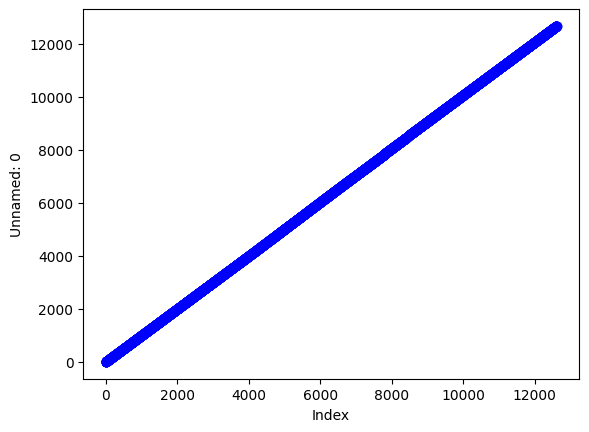

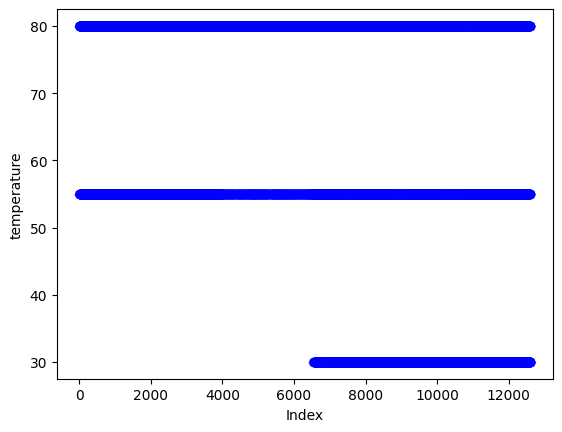

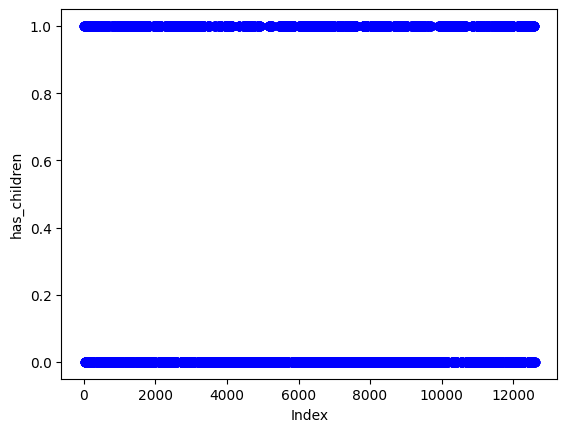

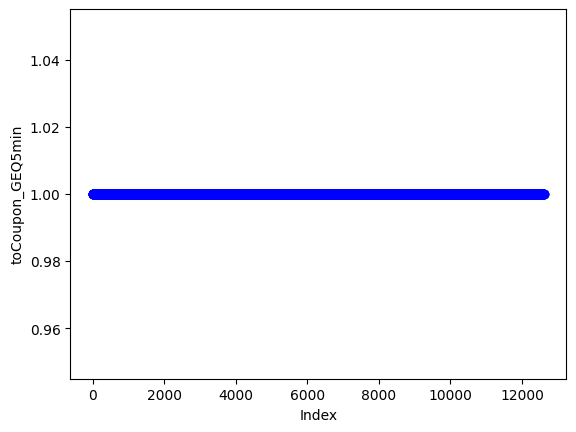

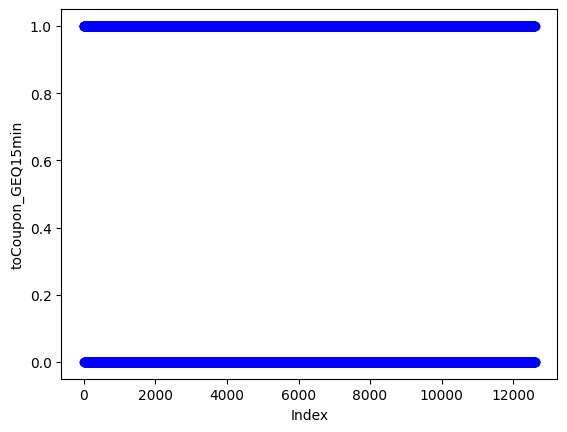

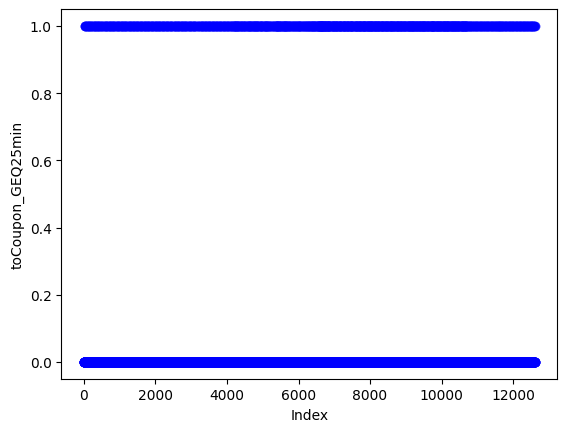

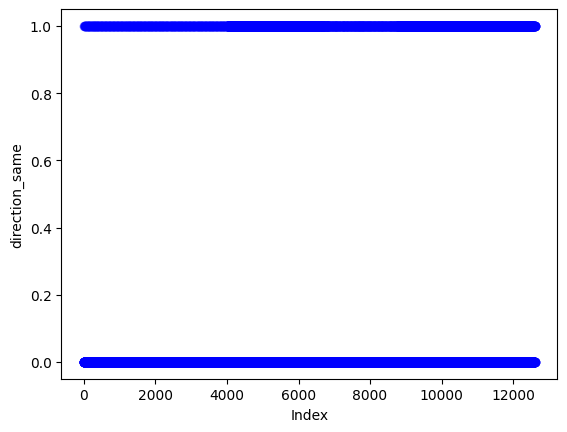

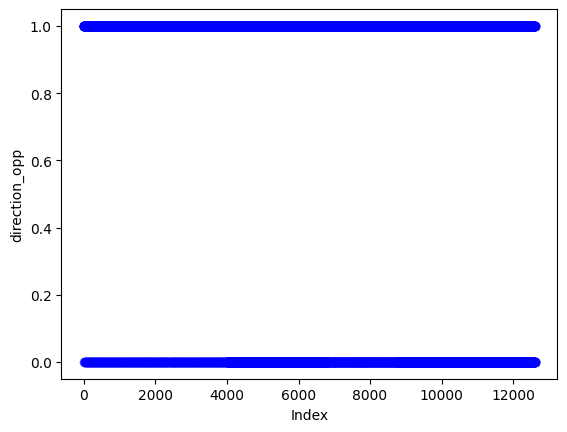

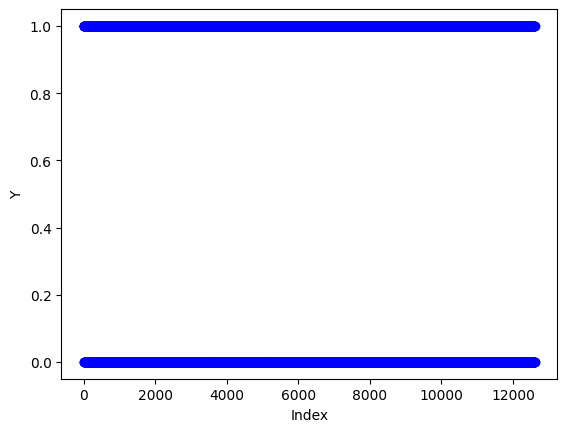

In [212]:
for col in numeric_cols:
  plt.scatter(df.index, df[col], color='blue', alpha=0.5)
  plt.xlabel('Index')
  plt.ylabel(col)
  plt.show()

So from the given scatterplots I can see a pattern as in most of the so called 'numeric' columns seem to have binary values which make me suspect that these were in fact categorical values originally and were converted to these using One Hot Encoding or maybe using dummies.

Anyway the point is since these used to be categorical anyways judging them as outliers doesn't seem like a very wise choice to me, so I am going to leave these columns as it is and work on the ones that actually have numerical values i.e. temperature column.

In [213]:
from scipy.stats import zscore
df['z_score'] = zscore(df['temperature'])
print(df[df['z_score'].abs() > 3])  # Check for values with |Z-Score| > 3

Empty DataFrame
Columns: [Unnamed: 0, destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y, z_score]
Index: []

[0 rows x 27 columns]


In [214]:
Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(df[(df['temperature'] < lower_bound) | (df['temperature'] > upper_bound)])

Empty DataFrame
Columns: [Unnamed: 0, destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y, z_score]
Index: []

[0 rows x 27 columns]


So since we were left with only the temperature column and given there were only three unique values I decided to check for outlier detection using both Z-Score method and the IQR method but as the results show there were no values flagged as outliers


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            12610 non-null  int64  
 1   destination           12610 non-null  object 
 2   passanger             12610 non-null  object 
 3   weather               12610 non-null  object 
 4   temperature           12610 non-null  int64  
 5   time                  12610 non-null  object 
 6   coupon                12610 non-null  object 
 7   expiration            12610 non-null  object 
 8   gender                12610 non-null  object 
 9   age                   12610 non-null  object 
 10  maritalStatus         12610 non-null  object 
 11  has_children          12610 non-null  int64  
 12  education             12610 non-null  object 
 13  occupation            12610 non-null  object 
 14  income                12610 non-null  object 
 15  Bar                

In [216]:
df.drop(columns=["z_score", "toCoupon_GEQ5min"], inplace=True)

In [217]:
df["gender"] = df["gender"].map({"Male": 0, "Female": 1})

In [218]:
for column in df.columns:
  print(f"{column}: {df[column].nunique()}")

Unnamed: 0: 12610
destination: 3
passanger: 4
weather: 3
temperature: 3
time: 5
coupon: 5
expiration: 2
gender: 2
age: 8
maritalStatus: 5
has_children: 2
education: 6
occupation: 25
income: 9
Bar: 5
CoffeeHouse: 5
CarryAway: 5
RestaurantLessThan20: 5
Restaurant20To50: 5
toCoupon_GEQ15min: 2
toCoupon_GEQ25min: 2
direction_same: 2
direction_opp: 2
Y: 2


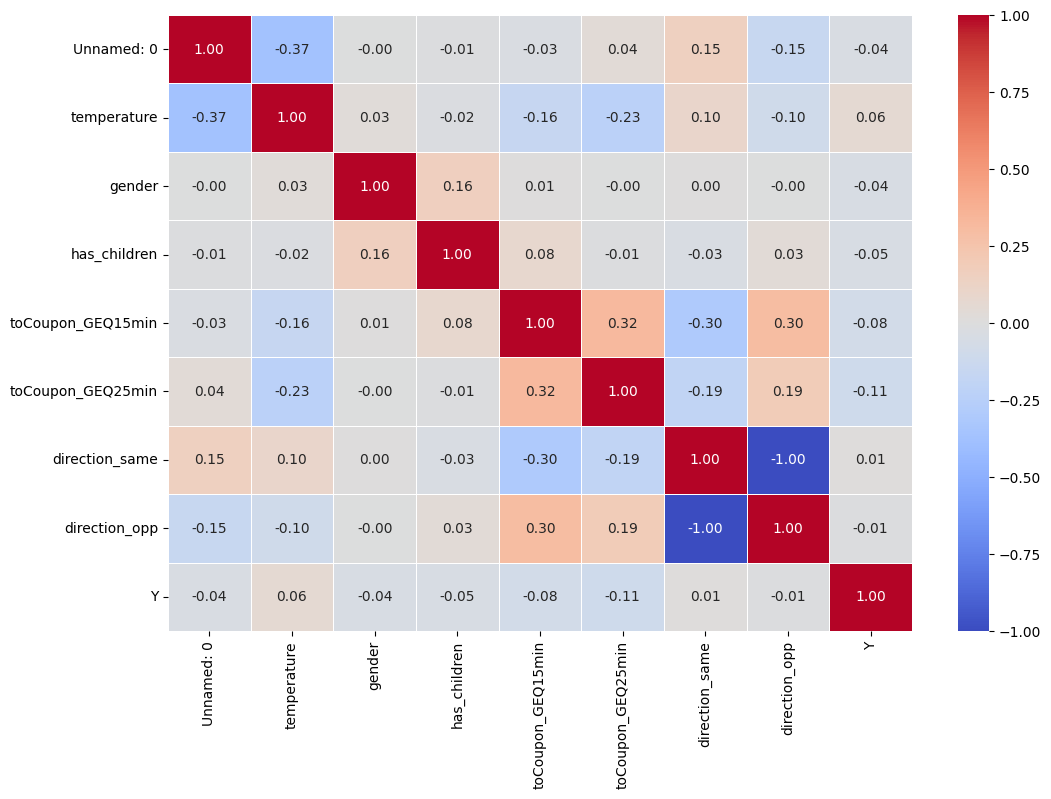

In [219]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

corr_matrix = numeric_df.corr(method="pearson")

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

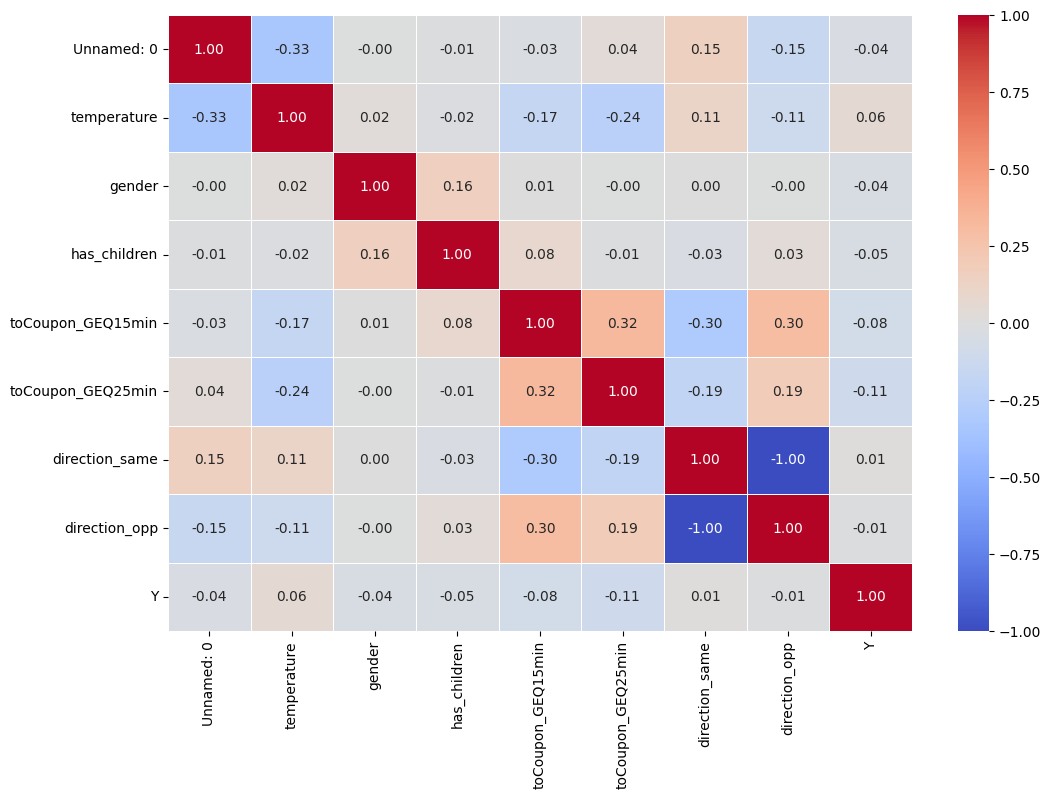

In [220]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

corr_matrix = numeric_df.corr(method="spearman")

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [221]:
correlations = numeric_df.corrwith(df['Y']).sort_values(ascending=False)
correlations

,0
Y,1.000000
temperature,0.059393
direction_same,0.014932
direction_opp,-0.014932
Unnamed: 0,-0.037678
gender,-0.043740
has_children,-0.045056
toCoupon_GEQ15min,-0.082693
toCoupon_GEQ25min,-0.108139
